In [27]:
import pandas as pd
import numpy as np

In [28]:
df_house=pd.read_excel('https://raw.githubusercontent.com/Xieanon/my-Homework/refs/heads/main/HW3_My_Data_My_Model/Housing_prices.xlsx')
df_rent=pd.read_excel('https://raw.githubusercontent.com/Xieanon/my-Homework/refs/heads/main/HW3_My_Data_My_Model/Rent.xlsx')

In [29]:
#IQR方法检测异常值
def detect_outliers(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=series[(series<lower_bound)|(series>upper_bound)]
    return outliers

In [30]:
locations=['苏州桥','万柳','北太平庄','世纪城']
results_price={}

print('房价数据分析')


for loc in locations:
    print(f"\n=== {loc} ===")
    block_data=df_house[df_house[loc]==1]
    # 描述性统计每个区域的房价数据
    desc=block_data[['单价','面积']].describe()
    print('描述性统计：')
    print(desc)
    #统计异常值
    outliers_price=detect_outliers(block_data['单价'])
    outliers_area=detect_outliers(block_data['面积'])
    print('每平米房价异常值数量：',len(outliers_price))
    print('面积异常值数量：',len(outliers_area))
    results_price[loc]={
        'description':desc,
        'outliers_price':outliers_price,
        'outliers_area':outliers_area
    }
    


房价数据分析

=== 苏州桥 ===
描述性统计：
                  单价          面积
count     307.000000  307.000000
mean    79682.791531   85.208697
std     11882.889471   58.549293
min     44927.000000   26.800000
25%     71675.000000   56.000000
50%     80560.000000   65.500000
75%     86683.500000   82.965000
max    113649.000000  337.400000
每平米房价异常值数量： 3
面积异常值数量： 42

=== 万柳 ===
描述性统计：
                  单价           面积
count    1200.000000  1200.000000
mean   153799.965957   184.964283
std     44526.717322    85.949319
min     61626.016260    44.170000
25%    128205.128205   127.810000
50%    141870.967742   158.050000
75%    167500.000000   230.010000
max    312685.533347   745.000000
每平米房价异常值数量： 131
面积异常值数量： 43

=== 北太平庄 ===
描述性统计：
                  单价          面积
count     197.000000  197.000000
mean    88429.664975  126.841371
std     21193.703438   83.073663
min     32369.000000   26.500000
25%     78176.000000   79.560000
50%     87341.000000   93.490000
75%    102444.000000  146.600000
max    14540

In [31]:
results_rent={}

print('租价数据分析')
for loc in locations:
    print(f"\n=== {loc} ===")
    block_data=df_rent[df_rent[loc]==1]
    #描述性统计每个区域的租价数据
    desc=block_data[['单价','面积']].describe()
    print('描述性统计：')
    print(desc)
    #统计异常值
    outliers_rent=detect_outliers(block_data['单价'])
    outliers_area=detect_outliers(block_data['面积'])

    print('每平米租价异常值数量：',len(outliers_rent))
    print('面积异常值数量：',len(outliers_area))

    results_rent[loc]={
        'description':desc,
        'outliers_rent':outliers_rent,
        'outliers_area':outliers_area
    }




租价数据分析

=== 苏州桥 ===
描述性统计：
               单价          面积
count  346.000000  346.000000
mean   136.819789   64.424855
std     45.165366   26.821284
min     40.579710    8.000000
25%    113.432836   55.250000
50%    126.666667   63.000000
75%    154.488636   72.000000
max    366.666667  254.000000
每平米租价异常值数量： 22
面积异常值数量： 47

=== 万柳 ===
描述性统计：
                单价           面积
count  1200.000000  1200.000000
mean    177.103331   181.715000
std      76.223515   120.273037
min      86.608927    42.000000
25%     130.864198    98.000000
50%     151.898734   148.500000
75%     179.487179   246.000000
max     448.916409  1501.000000
每平米租价异常值数量： 119
面积异常值数量： 5

=== 北太平庄 ===
描述性统计：
               单价          面积
count  252.000000  252.000000
mean   138.956170   68.674603
std     31.681913   41.202798
min     88.495575   10.000000
25%    118.181818   50.000000
50%    132.075472   56.000000
75%    150.000000   81.000000
max    291.666667  367.000000
每平米租价异常值数量： 16
面积异常值数量： 18

=== 世纪城 ===
描述性统计：
    

In [32]:
#中位数房价租金比
median_ratio=[]

print('中位数房价租金比')
for loc in locations:
    #取每平米房价和每平米租金中位数来求
    median_price=df_house[df_house[loc]==1]['单价'].median()
    median_rent=df_rent[df_rent[loc]==1]['单价'].median()
    print(f'{loc}：',median_price/median_rent)
    median_ratio+=[median_price/median_rent]

中位数房价租金比
苏州桥： 636.0
万柳： 933.9838709677418
北太平庄： 661.2961428571429
世纪城： 1013.4088125000001


Figure A


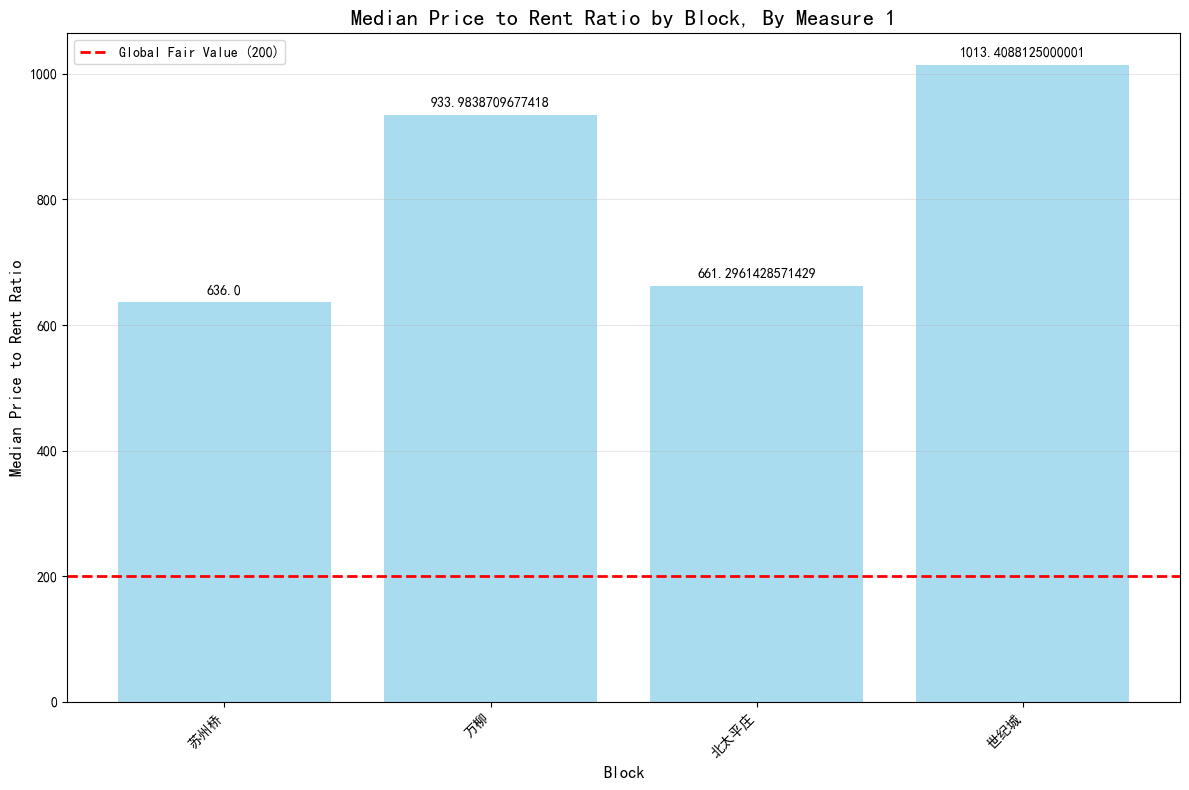

In [33]:
#画图A

print('Figure A')

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei', 'Microsoft YaHei', 'DejaVu Sans']

data={
    'block':locations,
    'median_ratio':median_ratio
}

df=pd.DataFrame(data)

plt.figure(figsize=(12,8))
bars=plt.bar(df['block'],df['median_ratio'],color='skyblue',alpha=0.7)
plt.axhline(y=200,color='red',linestyle='--',linewidth=2,label='Global Fair Value (200)')

plt.title('Median Price to Rent Ratio by Block, By Measure 1', fontsize=16, fontweight='bold')
plt.xlabel('Block', fontsize=12)
plt.ylabel('Median Price to Rent Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar,ratio in zip(bars,df['median_ratio']):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+10, f'{ratio}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()


In [34]:
#回归分析
import statsmodels.api as sm
import scipy.stats as stats

In [35]:
#每平米房价回归分析

print('Model 1 每平米房价关于面积和区域回归')
clm=['面积']+locations

#初始化数据，添加常数项
X_price=df_house[clm]
y=df_house['单价']
x_price=sm.add_constant(X_price)

#OLS回归
model=sm.OLS(y,x_price)
result=model.fit()
result.summary()



Model 1 每平米房价关于面积和区域回归


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     单价   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     981.9
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:49:05   Log-Likelihood:                -33768.
No. Observations:                2906   AIC:                         6.755e+04
Df Residuals:                    2901   BIC:                         6.757e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.022e+04    967.477     62.243      0.000    5.83e+04    6.21e+04
面积           238.9874      7.122     33.555      0.000     225.022     252.952
苏州桥         -899.8439   1322.502     -0.680      0.496   -3492.982    1693.294
万柳          4.938e+04    958.090     51.537      0.000    4.75e+04    5.13e+04
北太平庄       -2102.6562   1585.302     -1.326      0.185   -5211.088    1005.776
世纪城         1.384e+04    895.650     15.457      0.000    1.21e+04    1.56e+04
==============================================================================
Omnibus:                      222.519   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.549
Skew:                           0.397   Prob(JB):                    5.43e-142
Kurtosis:                       5.178   Cond. No.                     2.31e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
#输出回归重要数据
print('Model 1 每平米房价关于面积和区域的回归的相关系数和R^2')
print(f"Coefficients:\n ", result.params)
print(f"R^2: \n", result.rsquared)
#保存model 1
model1_result=result

Model 1 每平米房价关于面积和区域的回归的相关系数和R^2
Coefficients:
  const    60218.827681
面积         238.987433
苏州桥       -899.843894
万柳       49376.999087
北太平庄     -2102.656198
世纪城      13844.328686
dtype: float64
R^2: 
 0.5751728871440438


In [37]:
#每平米租价回归分析
print('Model 2 每平米租价关于面积和区域的回归')
X_rent=df_rent[clm]
y=df_rent['单价']
x_rent=sm.add_constant(X_rent)
#OLS回归
model=sm.OLS(y,x_rent)
result=model.fit()
result.summary()

Model 2 每平米租价关于面积和区域的回归


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     单价   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     309.5
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          4.52e-223
Time:                        13:49:05   Log-Likelihood:                -16060.
No. Observations:                2998   AIC:                         3.213e+04
Df Residuals:                    2993   BIC:                         3.216e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.4849      1.425     64.215      0.000      88.691      94.278
面积             0.2436      0.011     21.685      0.000       0.222       0.266
苏州桥           29.6407      2.364     12.537      0.000      25.005      34.277
万柳            41.3518      1.782     23.204      0.000      37.858      44.846
北太平庄          30.7418      2.696     11.404      0.000      25.456      36.027
世纪城          -10.2495      1.653     -6.202      0.000     -13.490      -7.009
==============================================================================
Omnibus:                     1556.713   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18738.384
Skew:                           2.185   Prob(JB):                         0.00
Kurtosis:                      14.441   Cond. No.                     1.36e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.06e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
#输出回归重要数据
print('Model 2 每平米租价关于面积和区域的回归的相关系数和R^2')
print(f"Coefficients:\n ", result.params)
print(f"R^2: \n", result.rsquared)
#保存model 2
model2_result=result

Model 2 每平米租价关于面积和区域的回归的相关系数和R^2
Coefficients:
  const    91.484857
面积        0.243605
苏州桥      29.640711
万柳       41.351782
北太平庄     30.741833
世纪城     -10.249469
dtype: float64
R^2: 
 0.29261144580614284


In [39]:
#预测数据

Model_Median_ratio=[]

print('地区按回归模型所得房价租金比中位数：')

for loc in locations:
    X=df_house[df_house[loc]==1][clm]
    new_X=sm.add_constant(X, has_constant='add')

    #通过model 1和model 2，用房价数据预测房价和租金，求对应的房价租金比
    model1_price=model1_result.predict(new_X)
    model1_rent=model2_result.predict(new_X)
    #得到ratio 1
    ratio1=model1_price/model1_rent

    X=df_rent[df_rent[loc]==1][clm]
    new_X=sm.add_constant(X, has_constant='add')
    #通过model 1和model 2，用租金数据预测房价和租金，求对应的房价租金比
    model2_price=model1_result.predict(new_X)
    model2_rent=model2_result.predict(new_X)
    #得到ratio 2
    ratio2=model2_price/model2_rent

    #合并ratio 1和ratio 2，求中位数
    all_ratios = np.concatenate([ratio1, ratio2])
    print(f'{loc}：{np.median(all_ratios)}')
    
    Model_Median_ratio+=[np.median(all_ratios)]

地区按回归模型所得房价租金比中位数：
苏州桥：545.7592393678067
万柳：859.7442208120641
北太平庄：541.22288476012
世纪城：934.5975561598656


Figure B


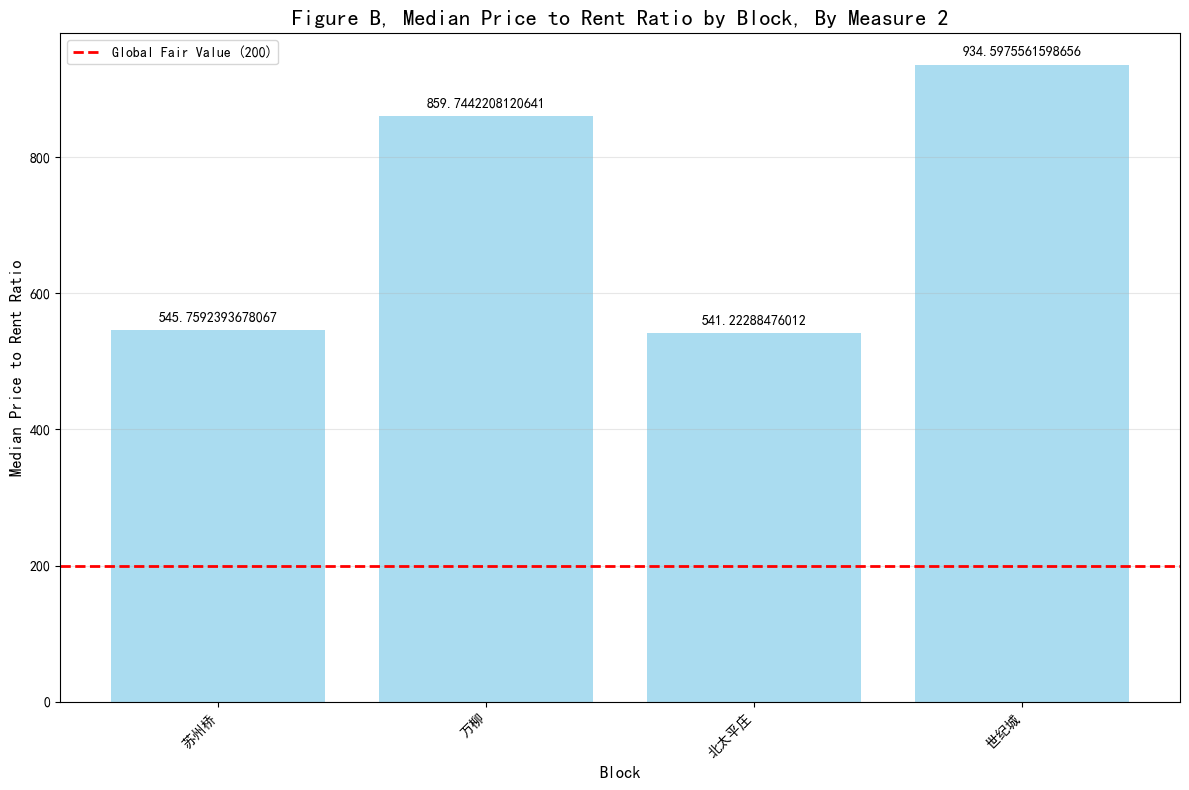

In [40]:
#画图
print('Figure B')
plt.rcParams['font.sans-serif']=['SimHei', 'Microsoft YaHei', 'DejaVu Sans']

data={
    'block':locations,
    'median_ratio':Model_Median_ratio
}

df=pd.DataFrame(data)

plt.figure(figsize=(12,8))
bars=plt.bar(df['block'],df['median_ratio'],color='skyblue',alpha=0.7)
plt.axhline(y=200,color='red',linestyle='--',linewidth=2,label='Global Fair Value (200)')

plt.title('Figure B, Median Price to Rent Ratio by Block, By Measure 2', fontsize=16, fontweight='bold')
plt.xlabel('Block', fontsize=12)
plt.ylabel('Median Price to Rent Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar,ratio in zip(bars,df['median_ratio']):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+10, f'{ratio}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

In [41]:
#交互项回归
print('Model 1+ 采取加入非线性项和交互项')
print('交互项为面积乘以区块，非线性项有面积平方，面积求自然对数')

Model 1+ 采取加入非线性项和交互项
交互项为面积乘以区块，非线性项有面积平方，面积求自然对数


In [42]:
print('房价分析')

ind=['面积','苏州桥','万柳','北太平庄','世纪城','面积*苏州桥','面积*万柳','面积*北太平庄','面积*世纪城','面积^2','ln(面积+1)']

#添加面积和区域的交互项
df1=pd.read_excel('https://raw.githubusercontent.com/Xieanon/my-Homework/refs/heads/main/HW3_My_Data_My_Model/Housing_prices.xlsx')
df1['面积*苏州桥']=df1['面积']*df1['苏州桥']
df1['面积*万柳']=df1['面积']*df1['万柳']
df1['面积*北太平庄']=df1['面积']*df1['北太平庄']
df1['面积*世纪城']=df1['面积']*df1['世纪城']
#添加面积平方项和自然对数项
df1['面积^2']=df1['面积']**2
df1['ln(面积+1)']=np.log(df1['面积']+1)

X=df1[ind]
new_X=sm.add_constant(X)
y=df1['单价']
#OLS回归
model=sm.OLS(y,new_X)
result=model.fit()
#保存model 1+
Model1_new_result=result
result.summary()

房价分析


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     单价   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     588.7
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:49:11   Log-Likelihood:                -33500.
No. Observations:                2906   AIC:                         6.702e+04
Df Residuals:                    2896   BIC:                         6.708e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.152e+05   2.02e+04     10.676      0.000    1.76e+05    2.55e+05
面积           555.1839     62.373      8.901      0.000     432.883     677.484
苏州桥         4.337e+04   4566.741      9.497      0.000    3.44e+04    5.23e+04
万柳          5.589e+04   5817.400      9.608      0.000    4.45e+04    6.73e+04
北太平庄        4.813e+04   5525.027      8.711      0.000    3.73e+04     5.9e+04
世纪城         6.784e+04   6199.151     10.944      0.000    5.57e+04       8e+04
面积*苏州桥         7.2944     28.305      0.258      0.797     -48.206      62.795
面积*万柳        372.7771     17.613     21.165      0.000     338.242     407.312
面积*北太平庄       71.0401     24.221      2.933      0.003      23.549     118.531
面积*世纪城       104.0723     17.832      5.836      0.000      69.108     139.037
面积^2          -0.6739      0.093     -7.208      0.000      -0.857      -0.491
ln(面积+1)   -5.092e+04   6966.667     -7.309      0.000   -6.46e+04   -3.73e+04
==============================================================================
Omnibus:                      249.362   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1029.862
Skew:                           0.330   Prob(JB):                    2.34e-224
Kurtosis:                       5.841   Cond. No.                     9.24e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
print('Model 1+ 每平米房价关于交互项和非线性项的回归相关系数和R^2')
print(f"Coefficients:\n ", result.params)
print(f"R^2: \n", result.rsquared)

Model 1+ 每平米房价关于交互项和非线性项的回归相关系数和R^2
Coefficients:
  const       215236.832737
面积             555.183913
苏州桥          43372.103941
万柳           55894.322713
北太平庄         48129.753026
世纪城          67840.653056
面积*苏州桥           7.294408
面积*万柳          372.777130
面积*北太平庄         71.040075
面积*世纪城         104.072301
面积^2            -0.673933
ln(面积+1)    -50918.269836
dtype: float64
R^2: 
 0.6465646105625013


In [44]:
print('租价分析')
df2=pd.read_excel('https://raw.githubusercontent.com/Xieanon/my-Homework/refs/heads/main/HW3_My_Data_My_Model/Rent.xlsx')
#同理加交互项和非线性项
df2['面积*苏州桥']=df2['面积']*df2['苏州桥']
df2['面积*万柳']=df2['面积']*df2['万柳']
df2['面积*北太平庄']=df2['面积']*df2['北太平庄']
df2['面积*世纪城']=df2['面积']*df2['世纪城']

df2['面积^2']=df2['面积']**2
df2['ln(面积+1)']=np.log(df2['面积']+1)

X=df2[ind]
new_X=sm.add_constant(X)
y=df2['单价']
#OLS回归
model=sm.OLS(y,new_X)
result=model.fit()
#保存model 2+
Model2_new_result=result
result.summary()

租价分析


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     单价   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     215.7
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          7.20e-317
Time:                        13:49:18   Log-Likelihood:                -15829.
No. Observations:                2998   AIC:                         3.168e+04
Df Residuals:                    2988   BIC:                         3.174e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.7416     17.216     15.552      0.000     233.986     301.498
面积             0.4874      0.058      8.444      0.000       0.374       0.601
苏州桥           99.6258      5.856     17.014      0.000      88.145     111.107
万柳            57.6416      6.902      8.351      0.000      44.108      71.176
北太平庄          77.4622      5.586     13.866      0.000      66.509      88.416
世纪城           33.0119      7.771      4.248      0.000      17.775      48.249
面积*苏州桥        -0.3184      0.088     -3.622      0.000      -0.491      -0.146
面积*万柳          0.4507      0.029     15.637      0.000       0.394       0.507
面积*北太平庄        0.0402      0.066      0.605      0.546      -0.090       0.170
面积*世纪城         0.3150      0.033      9.404      0.000       0.249       0.381
面积^2          -0.0006   3.19e-05    -17.557      0.000      -0.001      -0.000
ln(面积+1)     -58.2608      6.029     -9.663      0.000     -70.083     -46.439
==============================================================================
Omnibus:                     1509.023   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13075.644
Skew:                           2.221   Prob(JB):                         0.00
Kurtosis:                      12.217   Cond. No.                     5.68e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.19e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
print('Model 1+ 每平米租价关于交互项和非线性项的回归相关系数和R^2')
print(f"Coefficients:\n ", result.params)
print(f"R^2: \n", result.rsquared)

Model 1+ 每平米租价关于交互项和非线性项的回归相关系数和R^2
Coefficients:
  const       267.741595
面积            0.487403
苏州桥          99.625839
万柳           57.641620
北太平庄         77.462244
世纪城          33.011892
面积*苏州桥       -0.318408
面积*万柳         0.450663
面积*北太平庄       0.040176
面积*世纪城        0.314972
面积^2         -0.000559
ln(面积+1)    -58.260762
dtype: float64
R^2: 
 0.3938025933774003


In [46]:
#比较 model 1, model 2和 model1+, model 2+的R^2

if model1_result.rsquared<Model1_new_result.rsquared:
    print(f'Model 1的R^2={model1_result.rsquared}<Model 1+的R^2={Model1_new_result.rsquared}')
else:
    print(f'Model 1的R^2={model1_result.rsquared}>Model 1+的R^2={Model1_new_result.rsquared}')
if model2_result.rsquared<Model2_new_result.rsquared:
    print(f'Model 2的R^2={model2_result.rsquared}<Model 2+的R^2={Model2_new_result.rsquared}')
else:
    print(f'Model 2的R^2={model2_result.rsquared}>Model 2+的R^2={Model2_new_result.rsquared}')

Model 1的R^2=0.5751728871440438<Model 1+的R^2=0.6465646105625013
Model 2的R^2=0.29261144580614284<Model 2+的R^2=0.3938025933774003


所以应选择Model 1+和Model 2+

In [47]:
#预测数据

New_Median_ratio=[]
print('地区按新模型预测的中位数房价租金比：')


for loc in locations:
    X=df1[df1[loc]==1][ind]
    new_X=sm.add_constant(X, has_constant='add')
    #同理，重新预测得到对应的房价和租金
    model1_price=Model1_new_result.predict(new_X)
    model1_rent=Model2_new_result.predict(new_X)
    ratio1=model1_price/model1_rent

    X=df2[df2[loc]==1][ind]
    new_X=sm.add_constant(X,has_constant='add')
    
    model2_price=Model1_new_result.predict(new_X)
    model2_rent=Model2_new_result.predict(new_X)
    ratio2=model2_price/model2_rent
    all_ratios=np.concatenate([ratio1,ratio2])

    print(f'{loc}：{np.median(all_ratios)}')
    New_Median_ratio+=[np.median(all_ratios)]

    

地区按新模型预测的中位数房价租金比：
苏州桥：598.8992690561449
万柳：868.4275655542483
北太平庄：668.8046575690215
世纪城：943.4312430451226


Figure C


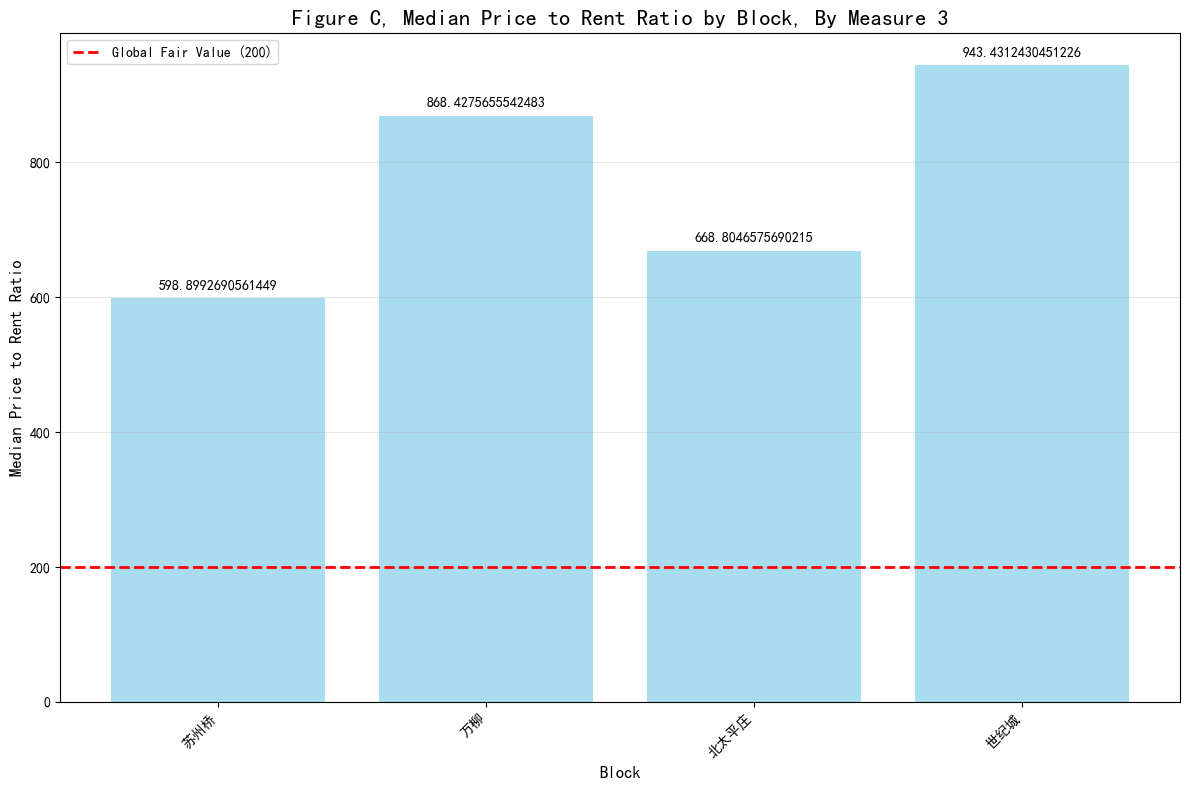

In [48]:
print('Figure C')
plt.rcParams['font.sans-serif']=['SimHei', 'Microsoft YaHei', 'DejaVu Sans']

data={
    'block':locations,
    'median_ratio':New_Median_ratio
}

df=pd.DataFrame(data)

plt.figure(figsize=(12,8))
bars=plt.bar(df['block'],df['median_ratio'],color='skyblue',alpha=0.7)
plt.axhline(y=200,color='red',linestyle='--',linewidth=2,label='Global Fair Value (200)')

plt.title('Figure C, Median Price to Rent Ratio by Block, By Measure 3', fontsize=16, fontweight='bold')
plt.xlabel('Block', fontsize=12)
plt.ylabel('Median Price to Rent Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar,ratio in zip(bars,df['median_ratio']):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+10, f'{ratio}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

在Measure 1中，房价和租金不能一一对应，而在Measure 2中，Model 1和Model 2是关于房价，租金数据的拟合训练得出，然后分别对房价预测对应的租金，对租金预测对应的房价，因此数据量是Measure 1的两倍，更加合理。同时，在Measure 3中，Model 1+和Model 2+的R^2更大，说明拟合结果更加良好，数据量和Measure 2一样多，所以Measure 3的测算更加可信。